# Linear Regression

- data is from: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities/data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving amsterdam_combined_dummified.csv to amsterdam_combined_dummified.csv
User uploaded file "amsterdam_combined_dummified.csv" with length 145277 bytes


In [ ]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
file_path = 'amsterdam_combined_dummified.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
df.head()

,Total_Price,Is_Shared_Room,Is_Private_Room,Max_Person_Capacity,Is_Super_Host,Is_Multi_Room,Is_Business_Listing,Cleanliness_Rating,Guest_Satisfaction_Rating,Number_of_Bedrooms,Distance_from_City_Center,Distance_from_Metro,Day_Type_Weekend
0,194.033698,False,True,2,False,1,0,10,93,1,5.022964,2.539380,0
1,344.245776,False,True,4,False,0,0,8,85,1,0.488389,0.239404,0
2,264.101422,False,True,2,False,0,1,9,87,1,5.748312,3.651621,0
3,433.529398,False,True,4,False,0,1,9,90,2,0.384862,0.439876,0
4,485.552926,False,True,2,True,0,0,10,98,1,0.544738,0.318693,0


In [ ]:
# Check the data types of all columns
df.dtypes


Total_Price                  float64
Is_Shared_Room                  bool
Is_Private_Room                 bool
Max_Person_Capacity            int64
Is_Super_Host                   bool
Is_Multi_Room                  int64
Is_Business_Listing            int64
Cleanliness_Rating             int64
Guest_Satisfaction_Rating      int64
Number_of_Bedrooms             int64
Distance_from_City_Center    float64
Distance_from_Metro          float64
Day_Type_Weekend               int64
dtype: object

In [ ]:
# Convert boolean columns to integers
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

# EDA

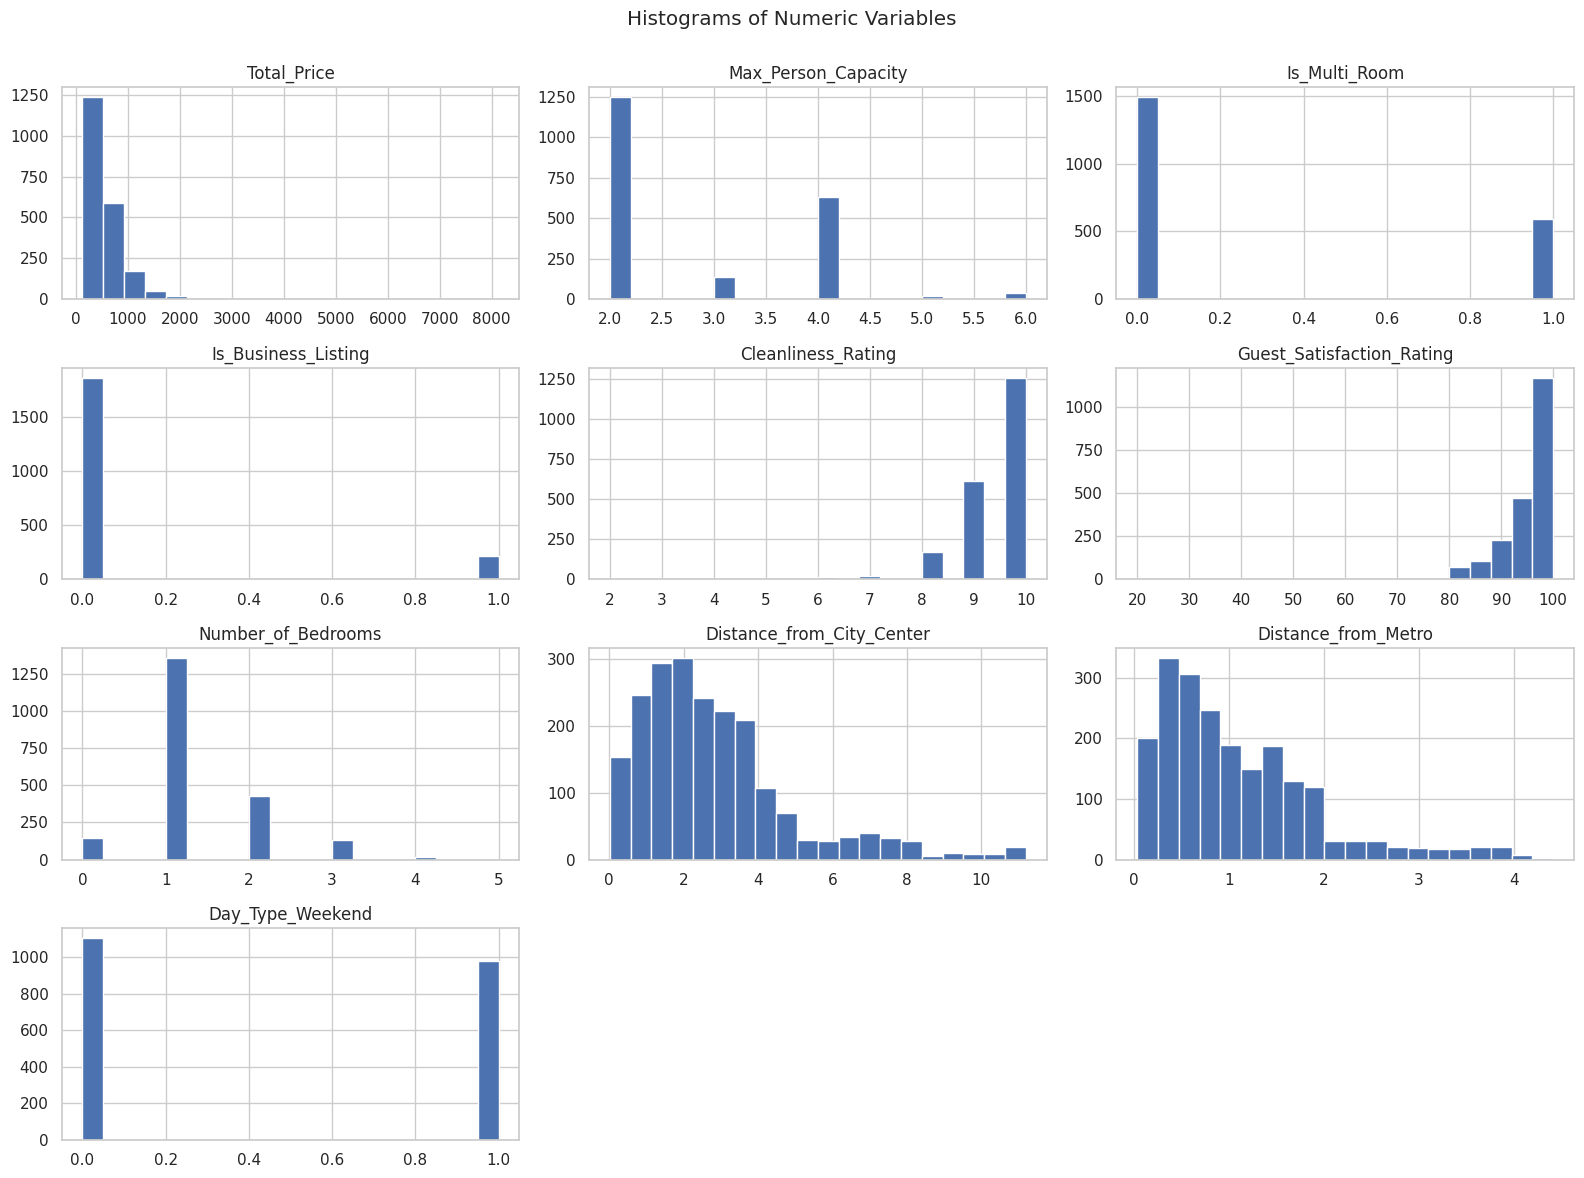

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Generate histograms for each numeric column
df.hist(figsize=(16, 12), bins=20)
plt.suptitle('Histograms of Numeric Variables')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


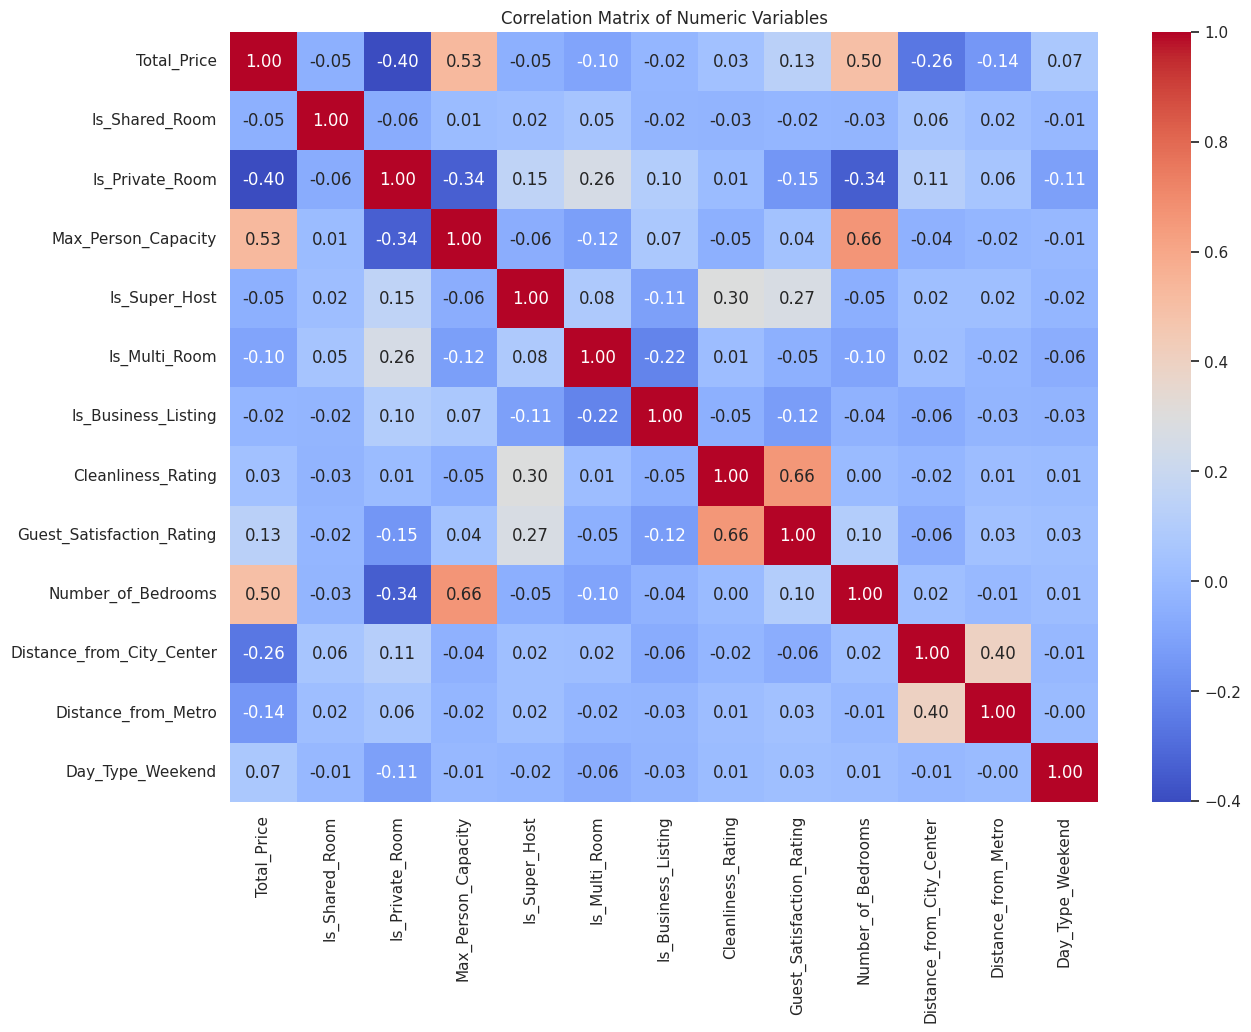

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


# Transform variables

In [ ]:
import numpy as np

# Log-transform the 'Total_Price', 'Distance_from_City_Center', and 'Distance_from_Metro' columns
df['Total_Price'] = np.log1p(df['Total_Price'])
df['Distance_from_City_Center'] = np.log1p(df['Distance_from_City_Center'])
df['Distance_from_Metro'] = np.log1p(df['Distance_from_Metro'])

# Rescale 'Guest_Satisfaction_Rating' by dividing by 10
df['Guest_Satisfaction_Rating'] = df['Guest_Satisfaction_Rating'] / 10

# Show first few rows to verify transformations
df.head()


,Total_Price,Is_Shared_Room,Is_Private_Room,Max_Person_Capacity,Is_Super_Host,Is_Multi_Room,Is_Business_Listing,Cleanliness_Rating,Guest_Satisfaction_Rating,Number_of_Bedrooms,Distance_from_City_Center,Distance_from_Metro,Day_Type_Weekend
0,5.273172,False,True,2,False,1,0,10,9.3,1,1.795579,1.263952,0
1,5.844257,False,True,4,False,0,0,8,8.5,1,0.397695,0.214631,0
2,5.580112,False,True,2,False,0,1,9,8.7,1,1.909292,1.537216,0
3,6.074264,False,True,4,False,0,1,9,9.0,2,0.325601,0.364557,0
4,6.187346,False,True,2,True,0,0,10,9.8,1,0.434854,0.276641,0


# Multivariate regression with all variables

In [ ]:
import statsmodels.api as sm

# Define the target and predictor variables
y = df['Total_Price']
X = df.drop('Total_Price', axis=1)

# Add a constant to the predictor variables (required for the OLS model in statsmodels)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     373.8
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:17:57   Log-Likelihood:                -438.16
No. Observations:                2080   AIC:                             902.3
Df Residuals:                    2067   BIC:                             975.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.7001      0.111     51.401      0.000       5.483       5.918
Is_Shared_Room               -0.6274      0.096     -6.550      0.000      -0.815      -0.440
Is_Private_Room              -0.3652      0.015    -23.675      0.000      -0.395      -0.335
Max_Person_Capacity           0.1773      0.009     20.276      0.000       0.160       0.194
Is_Super_Host                 0.0083      0.016      0.527      0.598      -0.023       0.039
Is_Multi_Room                -0.0304      0.016     -1.938      0.053      -0.061       0.000
Is_Business_Listing          -0.0207      0.023     -0.905      0.366      -0.066       0.024
Cleanliness_Rating            0.0098      0.011      0.892      0.372      -0.012       0.031
Guest_Satisfaction_Rating     0.0365      0.014      2.551      0.011       0.008       0.065
Number_of_Bedrooms            0.1472      0.012     12.011      0.000       0.123       0.171
Distance_from_City_Center    -0.3572      0.015    -24.509      0.000      -0.386      -0.329
Distance_from_Metro          -0.0782      0.020     -3.859      0.000      -0.118      -0.038
Day_Type_Weekend              0.0729      0.013      5.487      0.000       0.047       0.099
==============================================================================
Omnibus:                      392.674   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1150.592
Skew:                           0.969   Prob(JB):                    1.42e-250
Kurtosis:                       6.085   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

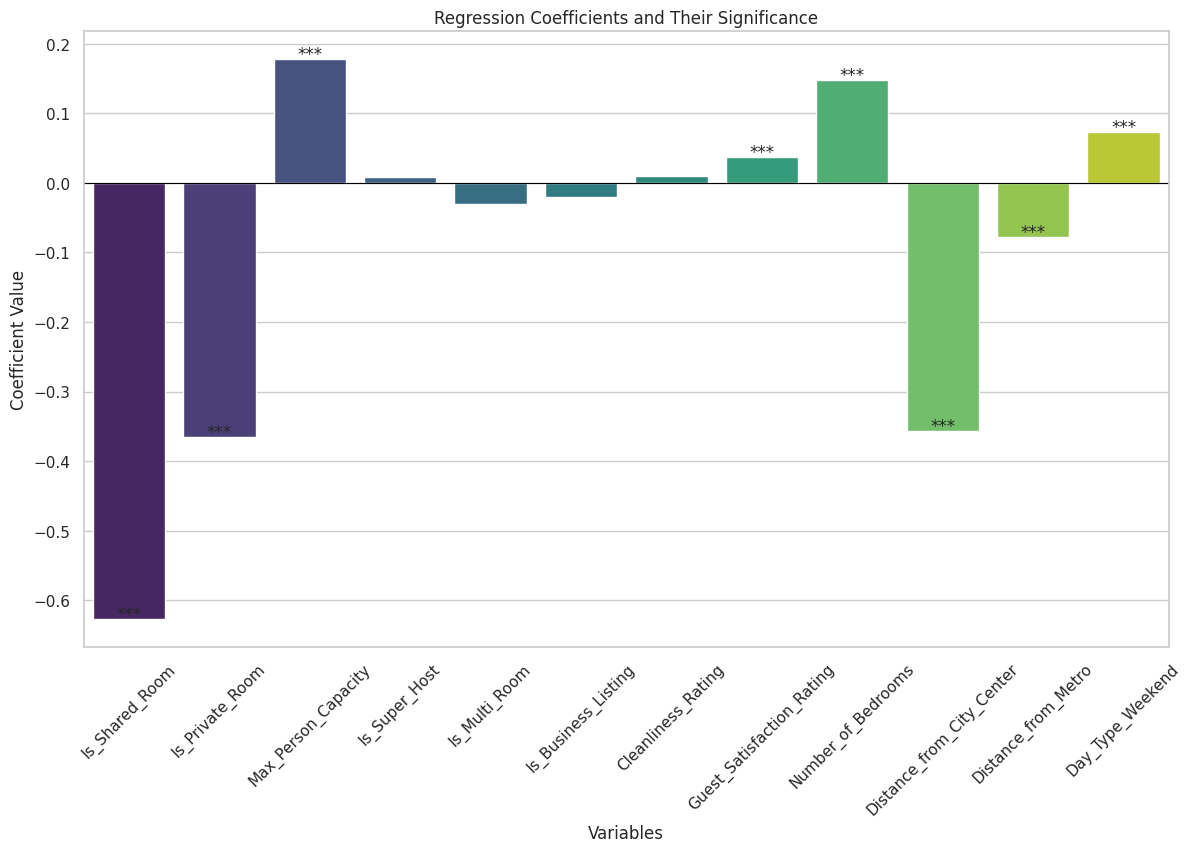

In [ ]:
# Plotting the coefficients
plt.figure(figsize=(14, 8))
sns.barplot(x=coef_df.index, y='Coefficient', data=coef_df, palette='viridis')

# Highlight the statistically significant coefficients
for var in significant_vars:
    plt.text(coef_df.index.get_loc(var), coef_df.loc[var, 'Coefficient'], '***', ha='center')

plt.title('Regression Coefficients and Their Significance')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)
plt.show()


# Forward Selection
- Loop to add one feature at a time
- Record the feature if it provides a lower RSS

In [ ]:
import statsmodels.api as sm

# Define the dependent and independent variables
y = df['Total_Price']
X = df[['Is_Shared_Room', 'Is_Private_Room', 'Max_Person_Capacity', 'Is_Super_Host',
        'Is_Multi_Room', 'Is_Business_Listing', 'Cleanliness_Rating',
        'Guest_Satisfaction_Rating', 'Number_of_Bedrooms',
        'Distance_from_City_Center', 'Distance_from_Metro', 'Day_Type_Weekend']]

# Initialize variables for tracking the best models
best_score = 0
forward_features = []
forward_scores = []

# Forward Selection
while len(X.columns) > 0:
    remaining_features = list(set(X.columns) - set(forward_features))
    new_score, best_feature = float('inf'), None

    # Loop to add one feature at a time
    for feature in remaining_features:
        X_temp = sm.add_constant(X[forward_features + [feature]])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if it provides a lower RSS
        if score < new_score:
            new_score, best_feature = score, feature
            new_adj_r2 = adj_r2

    # If the new model improves the score, add the best feature to the model
    if new_score < best_score or best_score == 0:
        forward_features.append(best_feature)
        forward_scores.append((new_score, new_adj_r2))
        best_score = new_score
    else:
        break

In [ ]:
# Create a DataFrame to store the results of Forward Selection
forward_results_df = pd.DataFrame({
    'Step': list(range(1, len(forward_features) + 1)),
    'Added_Variable': forward_features,
    'RSS': [score[0] for score in forward_scores],
    'Adjusted_R2': [score[1] for score in forward_scores],
    'Included_Variables': [forward_features[:i+1] for i in range(len(forward_features))]
})

forward_results_df


,Step,Added_Variable,RSS,Adjusted_R2,Included_Variables
0,1,Max_Person_Capacity,367.598708,0.374921,[Max_Person_Capacity]
1,2,Is_Private_Room,281.703157,0.520750,"[Max_Person_Capacity, Is_Private_Room]"
2,3,Distance_from_City_Center,211.208935,0.640506,"[Max_Person_Capacity, Is_Private_Room, Distanc..."
3,4,Number_of_Bedrooms,196.055136,0.666138,"[Max_Person_Capacity, Is_Private_Room, Distanc..."
4,5,Is_Shared_Room,191.823267,0.673187,"[Max_Person_Capacity, Is_Private_Room, Distanc..."
5,6,Day_Type_Weekend,189.018482,0.677810,"[Max_Person_Capacity, Is_Private_Room, Distanc..."
6,7,Guest_Satisfaction_Rating,187.351231,0.680498,"[Max_Person_Capacity, Is_Private_Room, Distanc..."
7,8,Distance_from_Metro,186.046034,0.682571,"[Max_Person_Capacity, Is_Private_Room, Distanc..."
8,9,Is_Multi_Room,185.779767,0.682872,"[Max_Person_Capacity, Is_Private_Room, Distanc..."
9,10,Cleanliness_Rating,185.700759,0.682853,"[Max_Person_Capacity, Is_Private_Room, Distanc..."


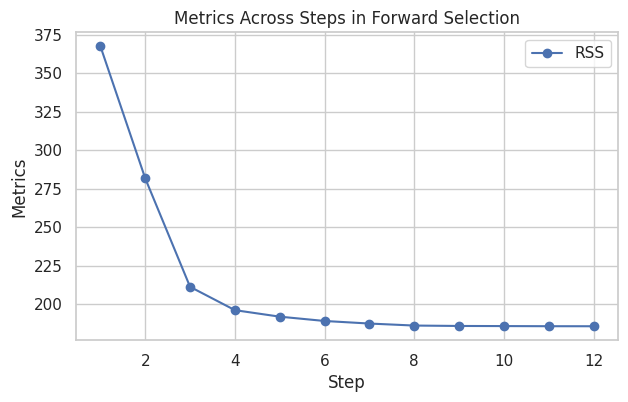

In [ ]:
# Plotting the results of Forward Selection
plt.figure(figsize=(7, 4))
plt.plot(forward_results_df['Step'], forward_results_df['RSS'], marker='o', label='RSS')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Forward Selection')
plt.legend()
plt.grid(True)
plt.show()


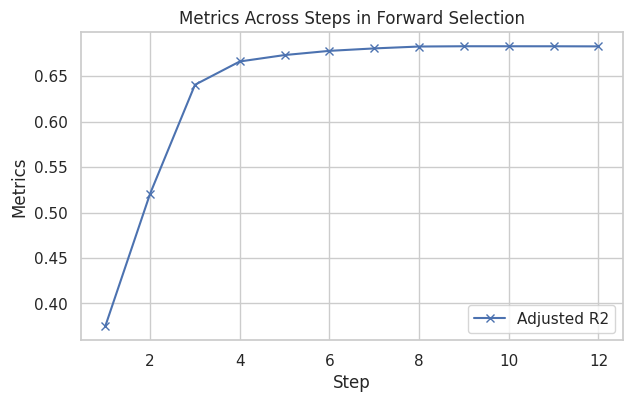

In [ ]:
# Plotting the results of Forward Selection
plt.figure(figsize=(7, 4))
plt.plot(forward_results_df['Step'], forward_results_df['Adjusted_R2'], marker='x', label='Adjusted R2')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Forward Selection')
plt.legend()
plt.grid(True)
plt.show()


# Backward Selection
- Loop to remove one feature at a time
- Record the feature if its removal results in a lower RSS

In [ ]:
# Re-initialize variables for tracking the best models
best_score = float('inf')
backward_features = list(X.columns)
backward_scores = []
backward_steps = []

# Re-run Backward Elimination with debugging information
while len(backward_features) > 0:
    new_score, worst_feature = float('inf'), None

    # Loop to remove one feature at a time
    for feature in backward_features:
        features_temp = list(set(backward_features) - {feature})
        X_temp = sm.add_constant(X[features_temp])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if its removal results in a lower RSS
        if score < new_score:
            new_score, worst_feature = score, feature
            new_adj_r2 = adj_r2

    # If the new model improves the score, remove the worst feature from the model
    if new_score < best_score:
        backward_features.remove(worst_feature)
        backward_scores.append((new_score, new_adj_r2))
        backward_steps.append((new_score, new_adj_r2, backward_features.copy()))
        best_score = new_score
    else:
        break

backward_steps


[(185.61765853893218,
  0.6828420912913495,
  ['Is_Shared_Room',
   'Is_Private_Room',
   'Max_Person_Capacity',
   'Is_Multi_Room',
   'Is_Business_Listing',
   'Cleanliness_Rating',
   'Guest_Satisfaction_Rating',
   'Number_of_Bedrooms',
   'Distance_from_City_Center',
   'Distance_from_Metro',
   'Day_Type_Weekend'])]

In [ ]:
# Continue Backward Elimination until only 6 variables are left in the model
while len(backward_features) > 6:
    new_score, worst_feature = float('inf'), None

    # Loop to remove one feature at a time
    for feature in backward_features:
        features_temp = list(set(backward_features) - {feature})
        X_temp = sm.add_constant(X[features_temp])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if its removal results in a lower RSS
        if score < new_score:
            new_score, worst_feature = score, feature
            new_adj_r2 = adj_r2

    # Remove the worst feature from the model
    backward_features.remove(worst_feature)
    backward_scores.append((new_score, new_adj_r2))
    backward_steps.append((new_score, new_adj_r2, backward_features.copy()))

# Create a DataFrame to store the results of continued Backward Elimination
backward_results_continued_df = pd.DataFrame({
    'Step': list(range(len(backward_features), 0, -1)),
    'Removed_Variable': backward_features[::-1],
    'RSS': [score[0] for score in backward_scores[::-1]],
    'Adjusted_R2': [score[1] for score in backward_scores[::-1]],
    'Included_Variables': [backward_features[:i] for i in range(len(backward_features), 0, -1)]
})

In [ ]:
backward_results_continued_df


,Step,Removed_Variable,RSS,Adjusted_R2,Included_Variables
0,6,Day_Type_Weekend,189.018482,0.677810,"[Is_Shared_Room, Is_Private_Room, Max_Person_C..."
1,5,Distance_from_City_Center,187.351231,0.680498,"[Is_Shared_Room, Is_Private_Room, Max_Person_C..."
2,4,Number_of_Bedrooms,186.046034,0.682571,"[Is_Shared_Room, Is_Private_Room, Max_Person_C..."
3,3,Max_Person_Capacity,185.779767,0.682872,"[Is_Shared_Room, Is_Private_Room, Max_Person_C..."
4,2,Is_Private_Room,185.700759,0.682853,"[Is_Shared_Room, Is_Private_Room]"
5,1,Is_Shared_Room,185.617659,0.682842,[Is_Shared_Room]


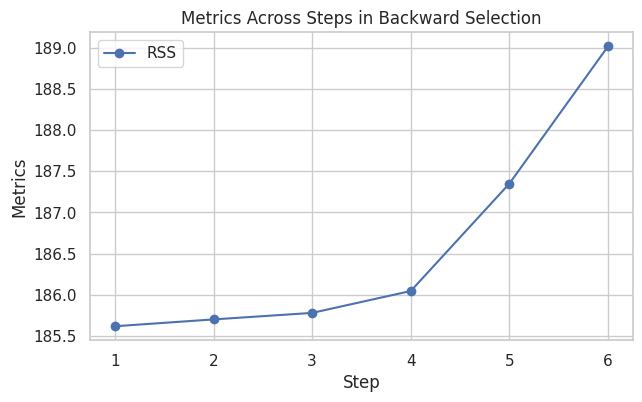

In [ ]:
# Plotting the results of Forward Selection
plt.figure(figsize=(7, 4))
plt.plot(backward_results_continued_df['Step'], backward_results_continued_df['RSS'], marker='o', label='RSS')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Backward Selection')
plt.legend()
plt.grid(True)
plt.show()


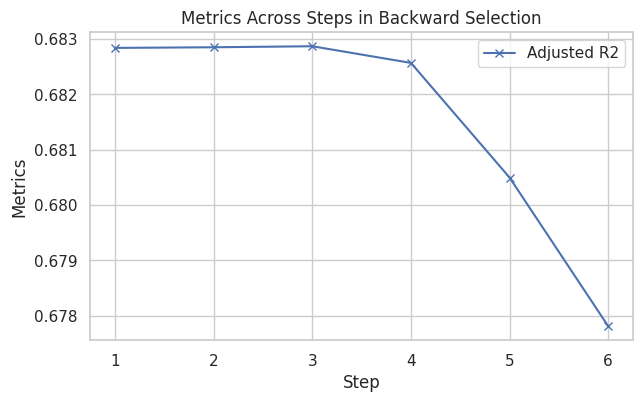

In [ ]:
# Plotting the results of Forward Selection
plt.figure(figsize=(7, 4))
plt.plot(backward_results_continued_df['Step'], backward_results_continued_df['Adjusted_R2'], marker='x', label='Adjusted R2')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Backward Selection')
plt.legend()
plt.grid(True)
plt.show()
